## Reto 3: Tablas de contingencia

### 1. Objetivos:
    - Aprender a generar tablas de contingencia utilizando múltiples variables categóricas.
 
---
    
### 2. Desarrollo:

En este Reto vamos a volver a utilizar el dataset 'melbourne_housing-clean.csv'. Nuestro objetivo será segmentar nuestros datos usando 2 y 3 variables categóricas y luego realizar algunas visualizaciones.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/melbourne_housing-clean.csv", index_col=0)
df.sample(3)

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
10937,Ferntree Gully,11 Aitken Ct,3,h,904000.0,SP,LJ,12/08/2017,24.8,3156.0,3.0,3.0,2.0,621.0,Manningham,-37.79207,145.11672,Northern Metropolitan,10788.0
6994,Hawthorn East,2/2 Clifton Rd,2,u,840000.0,S,Jellis,18/03/2017,7.5,3123.0,2.0,1.0,1.0,150.0,Boroondara,-37.84400,145.04960,Southern Metropolitan,6482.0
5449,Rosanna,70 McCrae Rd,3,h,780000.0,S,Barry,11/02/2017,11.4,3084.0,3.0,1.0,2.0,627.0,Banyule,-37.73670,145.07970,Eastern Metropolitan,3540.0


### a) Segmentando por tipo y número de cuartos

La primera parte consiste en lo siguiente:

1. Crea una tabla de contingencia usando como índice la variable 'type' y para las columnas la variable 'rooms'.
2. Crea una gráfica de barras para cada uno de los índices ('h', 't', 'u') donde el eje x sean las columnas de la tabla de contingencia.
3. Agrega los títulos y anotaciones necesarias.
4. Describe las similitudes y las diferencias de las distribuciones de las 3 gráficas.

In [2]:
# 0. Cambiamos de codigos a nombres
df['type'] = df['type']\
             .apply(lambda x: dict(h='house', u='unit-duplex',t='townhouse')[x])

# 1. Crear una tabla de contigencia
df_type_rooms = pd.crosstab(df['type'], df['rooms'])
df_type_rooms

rooms,1,2,3,4,5,6,7,8
type,,,,,,,,
house,54,1261,3912,1991,475,54,9,6
townhouse,9,299,575,138,4,0,0,0
unit-duplex,582,1829,429,17,0,1,0,1


Text(0.5, 1.0, "Numero de habitaciones en viviendas del tipo 'house'")

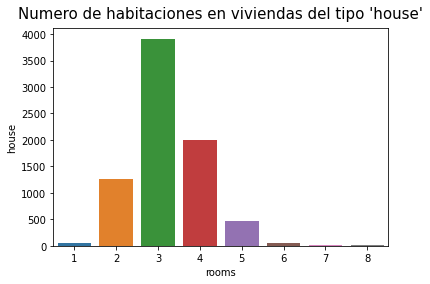

In [3]:
# 2.1 Crear una gráfica de barras
ax = sns.barplot(x = df_type_rooms.loc['house'].index,
                 y = df_type_rooms.loc['house'])
ax.set_title("Numero de habitaciones en viviendas del tipo 'house'", fontsize = 15, pad = 10)

Text(0.5, 1.0, "Numero de habitaciones en viviendas del tipo 'townhouse'")

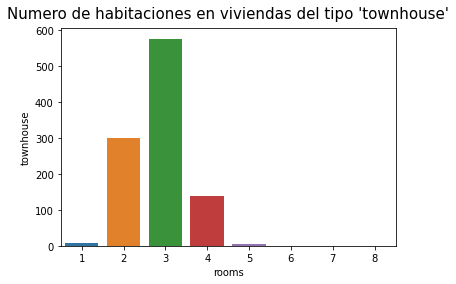

In [7]:
# 2.2 Crear una gráfica de barras
ax = sns.barplot(x = df_type_rooms.loc['townhouse'].index,
                 y = df_type_rooms.loc['townhouse'])
ax.set_title("Numero de habitaciones en viviendas del tipo 'townhouse'", fontsize = 15, pad = 10)

Text(0.5, 1.0, "Numero de habitaciones en viviendas del tipo 'unit-duplex'")

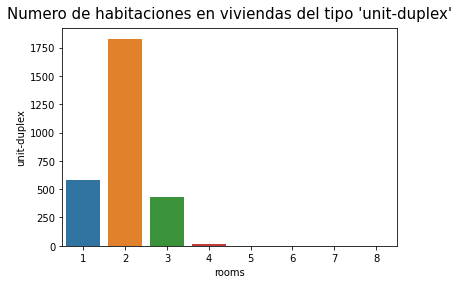

In [8]:
# 2.3 Crear una gráfica de barras
ax = sns.barplot(x = df_type_rooms.loc['unit-duplex'].index, y = df_type_rooms.loc['unit-duplex'])
ax.set_title("Numero de habitaciones en viviendas del tipo 'unit-duplex'", fontsize = 15, pad = 10)

### b) Segmentando por región, tipo y número de cuartos

Ahora vamos a hacer una triple segmentación. Realiza los siguientes pasos:

1. Crea una tabla de contingencia donde el índice sea la variable 'region_name' y las columnas tengan un doble nivel con las variables 'type' y 'rooms'.
2. Usa el método `stack` para convertir el nivel de columnas 'type' en un segundo nivel para el índice.
3. Genera 4 gráficas donde compares las distribuciones de cantidad de cuartos para el tipo de propiedad 'h' ('house') en las regiones 'Eastern Metropolitan', 'Northern Metropolitan', 'Southern Metropolitan' y 'Western Metropolitan'. Tendrás que acceder a cada `Serie` usando una tupla para indicar los valores de los dos niveles del índice.
4. Anota tus gráficas adecuadamente.
5. Describe las similitudes y diferencias entre las 4 gráficas.

In [9]:
# 1. Crear crosstab con tres variables
df_region_name_type_rooms = pd.crosstab(df['region_name'], [df['type'], df['rooms']])
df_region_name_type_rooms

type                       house                                townhouse  \
rooms                          1    2     3    4    5   6  7  8         1   
region_name                                                                 
Eastern Metropolitan           4   83   396  292   77   8  1  2         0   
Eastern Victoria               0    2    13   17    1   0  0  0         0   
Northern Metropolitan         23  539  1237  449   76   6  2  0         6   
Northern Victoria              0    2    12    5    1   1  0  0         0   
South-Eastern Metropolitan     0    8   123   74   14   5  0  0         0   
Southern Metropolitan         14  366  1028  704  217  23  5  3         3   
Western Metropolitan          13  260  1090  443   89  11  1  1         0   
Western Victoria               0    1    13    7    0   0  0  0         0   

type                                        unit-duplex                     
rooms                         2    3   4  5           1    2    3  4  6  8  
region_name                                                                 
Eastern Metropolitan         23   60  18  1           9   97   48  5  0  0  
Eastern Victoria              0    0   0  0           0    2    1  0  0  0  
Northern Metropolitan       134  139  10  1         196  499   98  2  0  1  
Northern Victoria             0    0   1  0           0    0    0  0  0  0  
South-Eastern Metropolitan    3   13   4  0           2   19    7  0  0  0  
Southern Metropolitan        72  233  78  0         311  968  192  7  0  0  
Western Metropolitan         67  130  27  2          64  243   83  3  1  0  
Western Victoria              0    0   0  0           0    1    0  0  0  0

In [10]:
# 2. Usar el metodo stack para convertie el nivel de columnas `type` en segundo nivel para el indice
df_region_name_type_rooms_stacked = df_region_name_type_rooms.stack(level=0)
df_region_name_type_rooms_stacked

rooms                                     1    2     3    4      5     6    7  \
region_name                type                                                 
Eastern Metropolitan       house          4   83   396  292   77.0   8.0  1.0   
                           townhouse      0   23    60   18    1.0   NaN  NaN   
                           unit-duplex    9   97    48    5    NaN   0.0  NaN   
Eastern Victoria           house          0    2    13   17    1.0   0.0  0.0   
                           townhouse      0    0     0    0    0.0   NaN  NaN   
                           unit-duplex    0    2     1    0    NaN   0.0  NaN   
Northern Metropolitan      house         23  539  1237  449   76.0   6.0  2.0   
                           townhouse      6  134   139   10    1.0   NaN  NaN   
                           unit-duplex  196  499    98    2    NaN   0.0  NaN   
Northern Victoria          house          0    2    12    5    1.0   1.0  0.0   
                           townhouse      0    0     0    1    0.0   NaN  NaN   
                           unit-duplex    0    0     0    0    NaN   0.0  NaN   
South-Eastern Metropolitan house          0    8   123   74   14.0   5.0  0.0   
                           townhouse      0    3    13    4    0.0   NaN  NaN   
                           unit-duplex    2   19     7    0    NaN   0.0  NaN   
Southern Metropolitan      house         14  366  1028  704  217.0  23.0  5.0   
                           townhouse      3   72   233   78    0.0   NaN  NaN   
                           unit-duplex  311  968   192    7    NaN   0.0  NaN   
Western Metropolitan       house         13  260  1090  443   89.0  11.0  1.0   
                           townhouse      0   67   130   27    2.0   NaN  NaN   
                           unit-duplex   64  243    83    3    NaN   1.0  NaN   
Western Victoria           house          0    1    13    7    0.0   0.0  0.0   
                           townhouse      0    0     0    0    0.0   NaN  NaN   
                           unit-duplex    0    1     0    0    NaN   0.0  NaN   

rooms                                     8  
region_name                type              
Eastern Metropolitan       house        2.0  
                           townhouse    NaN  
                           unit-duplex  0.0  
Eastern Victoria           house        0.0  
                           townhouse    NaN  
                           unit-duplex  0.0  
Northern Metropolitan      house        0.0  
                           townhouse    NaN  
                           unit-duplex  1.0  
Northern Victoria          house        0.0  
                           townhouse    NaN  
                           unit-duplex  0.0  
South-Eastern Metropolitan house        0.0  
                           townhouse    NaN  
                           unit-duplex  0.0  
Southern Metropolitan      house        3.0  
                           townhouse    NaN  
                           unit-duplex  0.0  
Western Metropolitan       house        1.0  
                           townhouse    NaN  
                           unit-duplex  0.0  
Western Victoria           house        0.0  
                           townhouse    NaN  
                           unit-duplex  0.0

In [23]:
df_region_name_type_rooms_stacked.loc[('Eastern Metropolitan','house')]

rooms
1      4.0
2     83.0
3    396.0
4    292.0
5     77.0
6      8.0
7      1.0
8      2.0
Name: (Eastern Metropolitan, house), dtype: float64

Text(0, 0.5, 'Frecuencia')

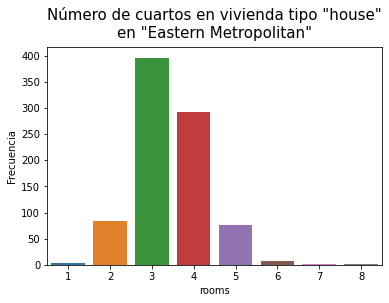

In [18]:
# 4.1 Crear gráficas de barras para el caso de 'house' en Eastern Metropolitan
ax = sns.barplot(x = df_region_name_type_rooms_stacked\
            .loc['Eastern Metropolitan', 'house']\
            .index,
            y = df_region_name_type_rooms_stacked\
            .loc['Eastern Metropolitan', 'house']
            )
ax.set_title('Número de cuartos en vivienda tipo "house"\nen "Eastern Metropolitan"',fontsize = 15, pad = 10)
ax.set_ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

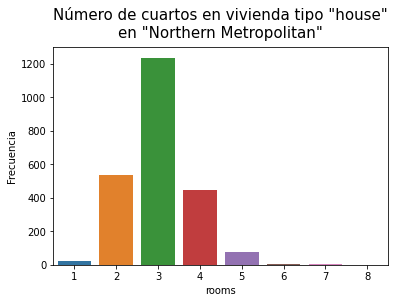

In [19]:
# 4.2 Crear gráficas de barras para el caso de 'house' en Northern Metropolitan
ax = sns.barplot(x = df_region_name_type_rooms_stacked\
            .loc['Northern Metropolitan', 'house']\
            .index,
            y = df_region_name_type_rooms_stacked\
            .loc['Northern Metropolitan', 'house']
            )
ax.set_title('Número de cuartos en vivienda tipo "house"\nen "Northern Metropolitan"',fontsize = 15, pad = 10)
ax.set_ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

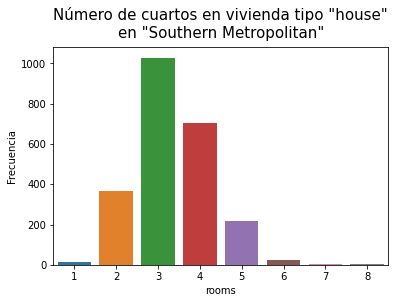

In [20]:
# 4.3 Crear gráficas de barras para el caso de 'house' en Southern Metropolitan
ax = sns.barplot(x = df_region_name_type_rooms_stacked\
            .loc['Southern Metropolitan', 'house']\
            .index,
            y = df_region_name_type_rooms_stacked\
            .loc['Southern Metropolitan', 'house']
            )
ax.set_title('Número de cuartos en vivienda tipo "house"\nen "Southern Metropolitan"',fontsize = 15, pad = 10)
ax.set_ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

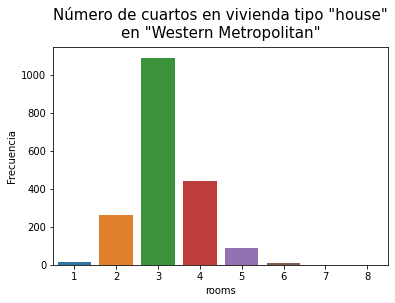

In [21]:
# 4.4 Crear gráficas de barras para el caso de 'house' en Western Metropolitan
ax = sns.barplot(x = df_region_name_type_rooms_stacked\
            .loc['Western Metropolitan', 'house']\
            .index,
            y = df_region_name_type_rooms_stacked\
            .loc['Western Metropolitan', 'house']
            )
ax.set_title('Número de cuartos en vivienda tipo "house"\nen "Western Metropolitan"',fontsize = 15, pad = 10)
ax.set_ylabel("Frecuencia")